# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow 

   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/300.9 MB 2.6 MB/s eta 0:01:54
   ---------------------------------------- 0.3/300.9 MB 3.5 MB/s eta 0:01:25
   ---------------------------------------- 0.6/300.9 MB 4.7 MB/s eta 0:01:05
   ---------------------------------------- 1.4/300.9 MB 8.2 MB/s eta 0:00:37
   ---------------------------------------- 2.3/300.9 MB 10.5 MB/s eta 0:00:29
   ---------------------------------------- 2.7/300.9 MB 10.2 MB/s eta 0:00:30
   ---------------------------------------- 3.3/300.9 MB 10.4 MB/s eta 0:00:29
   ---------------------------------------- 3.3/300.9 MB 10.4 MB/s eta 0:00:29
   ---------------------------------------- 3.5/300.9 MB 9.3 MB/s eta 0:00:32
    --------------------------------------- 4.8/300.9 MB 10.7 MB/s eta 0:00:28
    --------------------------------------- 5.1/300.9 MB 10.5 MB/s eta 0:00:29
    --------------------------------------- 5.7/300.9 MB 11.1 MB/

In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.6 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.5/38.6 MB 3.0 MB/s eta 0:00:13
   - -------------------------------------- 1.1/38.6 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 7.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.6 MB 9.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.8/38.6 MB 10.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.6 MB 10.4 MB/s eta 0:00:04
   ---- ----------------------------------- 4.3/38.6 MB 10.6 MB/s eta 0:00:04
   ----- ---------------------------------- 5.3/38.6 MB 11.0 MB/s eta 0:00:04
   ----- ---------------------------------- 5.7/38.6 MB 10.4 MB/s eta 0:00:04
   -----

In [3]:
!pip install mediapipe

   ---------------------------------------- 0.0/50.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.7 MB 1.7 MB/s eta 0:00:31
   ---------------------------------------- 0.2/50.7 MB 2.1 MB/s eta 0:00:25
   ---------------------------------------- 0.4/50.7 MB 2.8 MB/s eta 0:00:19
   ---------------------------------------- 0.6/50.7 MB 3.5 MB/s eta 0:00:15
    --------------------------------------- 0.9/50.7 MB 3.7 MB/s eta 0:00:14
    --------------------------------------- 1.2/50.7 MB 4.2 MB/s eta 0:00:12
   - -------------------------------------- 1.5/50.7 MB 4.5 MB/s eta 0:00:12
   - -------------------------------------- 1.8/50.7 MB 4.9 MB/s eta 0:00:10
   - -------------------------------------- 2.1/50.7 MB 5.0 MB/s eta 0:00:10
   - -------------------------------------- 2.5/50.7 MB 5.4 MB/s eta 0:00:09
   -- ------------------------------------- 2.8/50.7 MB 5.7 MB/s eta 0:00:09
   -- ------------------------------------- 3.2/50.7 MB 5.9 MB/s eta 0:00:09
   -- 

In [4]:
!pip install scikit-learn


In [5]:
!pip install matplotlib


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

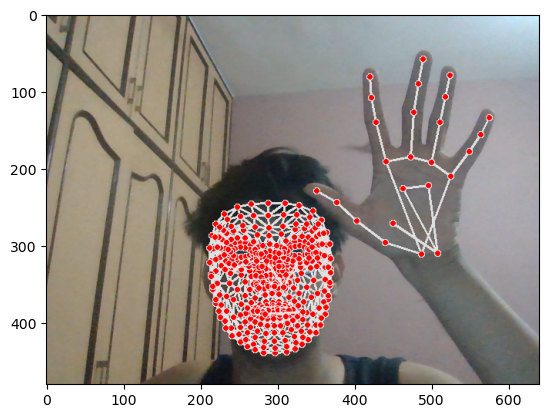

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    # if results.face_landmarks 
    # else np.zeros(1404)


In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test.shape

(1662,)

In [21]:
468*3+33*4+21*3+21*3

1662

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.48268166,  0.73928922, -1.12762451, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks','iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [25]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()               


KeyboardInterrupt: 

In [33]:
# cap.release()
# cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

In [42]:
np.array(labels).shape

(90,)

In [43]:
X = np.array(sequences)

In [44]:
X.shape

(90, 30, 1662)

In [45]:
y = to_categorical(labels).astype(int)

In [46]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [48]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [50]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [51]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [52]:
res = [.7, 0.2, 0.1]

In [53]:
actions[np.argmax(res)]

'hello'

In [54]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 6s 46ms/step - loss: 1.1486 - categorical_accuracy: 0.4471
Epoch 2/2000
3/3 [==============================] - 0s 39ms/step - loss: 6.1647 - categorical_accuracy: 0.2824
Epoch 3/2000
3/3 [==============================] - 0s 41ms/step - loss: 6.5797 - categorical_accuracy: 0.2941
Epoch 4/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.2947 - categorical_accuracy: 0.3647
Epoch 5/2000
3/3 [==============================] - 0s 44ms/step - loss: 4.9673 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.0516 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 38ms/step - loss: 6.8479 - categorical_accuracy: 0.4235
Epoch 8/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.0810 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 0s 44ms/step - loss: 3.3256 - categorical_accuracy: 0.4235

KeyboardInterrupt: 

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# 8. Make Predictions

In [57]:
res = model.predict(X_test)

1/1 [==============================] - 1s 660ms/step


In [64]:
actions[np.argmax(res[4])]

'iloveyou'

In [65]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [66]:
model.save('action.h5')

C:\Users\91902\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# del model

In [62]:
# model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [67]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [68]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [69]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [70]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 1],
        [0, 1]],

       [[3, 0],
        [1, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [71]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [72]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [74]:
# myfunction2= np.vectorize(prob_viz)
plt.figure(figsize=(18,18))
plt.imshow(myfunction2)

NameError: name 'myfunction2' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [76]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))